### Imports

In [1]:
import os

# Set current working directory to parent folder
os.chdir(os.path.abspath(".."))

In [3]:
import pandas as pd
import json

# Archivos importantes y paths
df_annotations = pd.read_excel('data/annotations.xlsx')

# Omitimos todos los audios en development
df_annotations = df_annotations[df_annotations['Type'] != 'Development'].reset_index(drop = True)

### WhisperTokenizer

In [2]:
from transformers import WhisperTokenizer

# Load the tokenizer
tokenizer = WhisperTokenizer.from_pretrained("openai/whisper-large")

# Get all tokens
all_tokens = tokenizer.get_vocab()

# Get max value item
max_value = max(zip(all_tokens.values(), all_tokens.keys()))[0]

C:\Users\emanu\Anaconda3\envs\SER\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [4]:
df_texto = pd.DataFrame()

df_texto.loc[0, 'id'] = 0

for file in os.listdir('data/TRANSCRIPCIONES/WHISPER'):
    with open(f'data/TRANSCRIPCIONES/WHISPER/{file}', 'r') as f: 
        data = json.load(f)
    
    start = max(df_texto.index)
    
    for i in range(len(data['segments'])):
        df_texto.at[i + start, 'Audio'] = file[:-5]
        df_texto.at[i + start, 'id'] = int(data['segments'][i]['id'])
        df_texto.at[i + start, 'Text'] = data['segments'][i]['text']
        df_texto.at[i + start, 'Tokens'] = str(data['segments'][i]['tokens'][1:-1])

In [5]:
df_texto.head()

,id,Audio,Text,Tokens
0,0.0,MSP-Conversation_0002,It's our honor to talk about important issues...,"[467, 311, 527, 5968, 281, 751, 466, 1021, 266..."
1,1.0,MSP-Conversation_0002,"The foundation of our show, Heart of the Matt...","[440, 7030, 295, 527, 855, 11, 13569, 295, 264..."
2,2.0,MSP-Conversation_0002,Important issues and why they should be on ou...,"[42908, 2663, 293, 983, 436, 820, 312, 322, 52..."
3,3.0,MSP-Conversation_0002,Looking at things as right versus wrong inste...,"[11053, 412, 721, 382, 558, 5717, 2085, 2602, ..."
4,4.0,MSP-Conversation_0002,And sharing stories with real people's experi...,"[400, 5414, 3676, 365, 957, 561, 311, 5235, 37..."


In [5]:
# Agregamos cantidad de palabras
df_texto['num_words'] = df_texto['Text'].apply(lambda x:len(str(x).split()))

In [6]:
df_texto.head()

,id,Audio,Text,Tokens,num_words
0,0.0,MSP-Conversation_0002,It's our honor to talk about important issues...,"[467, 311, 527, 5968, 281, 751, 466, 1021, 266...",16
1,1.0,MSP-Conversation_0002,"The foundation of our show, Heart of the Matt...","[440, 7030, 295, 527, 855, 11, 13569, 295, 264...",13
2,2.0,MSP-Conversation_0002,Important issues and why they should be on ou...,"[42908, 2663, 293, 983, 436, 820, 312, 322, 52...",11
3,3.0,MSP-Conversation_0002,Looking at things as right versus wrong inste...,"[11053, 412, 721, 382, 558, 5717, 2085, 2602, ...",12
4,4.0,MSP-Conversation_0002,And sharing stories with real people's experi...,"[400, 5414, 3676, 365, 957, 561, 311, 5235, 37...",19


In [11]:
df_texto.sort_values(by = 'num_words')

,id,Audio,Text,Tokens,num_words
81381,726.0,MSP-Conversation_2281,,[],0
12617,74.0,MSP-Conversation_0190,Maybe.,"[2704, 13]",1
13241,51.0,MSP-Conversation_0201,Yeah.,"[865, 13]",1
13242,52.0,MSP-Conversation_0201,Yeah.,"[865, 13]",1
67926,140.0,MSP-Conversation_1630,Shameful.,"[46835, 906, 13]",1
...,...,...,...,...,...
35700,41.0,MSP-Conversation_0646,"Left, right, center, government, paramilitari...","[16405, 11, 558, 11, 3056, 11, 2463, 11, 6220,...",86
12313,79.0,MSP-Conversation_0183,of that so we you're going to go next sure So...,"[295, 300, 370, 321, 291, 434, 516, 281, 352, ...",86
71720,98.0,MSP-Conversation_1917,"Yeah, exactly. Exactly. And I'm glad that we'...","[865, 11, 2293, 13, 7587, 13, 400, 286, 478, 5...",88
9259,17.0,MSP-Conversation_0147,"example, I'm a conservative, but I'm also a c...","[1365, 11, 286, 478, 257, 13780, 11, 457, 286,...",94


In [13]:
df_texto.iloc[71724].Text

" If I talk about this, is anyone going to believe me? You know, am I going to get in trouble for this? Is this going to be blamed on me? Like, all those thoughts go through somebody's head. And the abusers have ways of like, subtly instilling those thoughts, or at least invoking them, that, like invoking the thoughts that people absorb from just general culture and society. Like, society and culture teach you how to gaslight yourself almost into thinking that you weren't actually victimized, or even if you were, no one's going to get in trouble for you."

In [10]:
max(df_texto['num_words'])

100

### Distribuciones

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

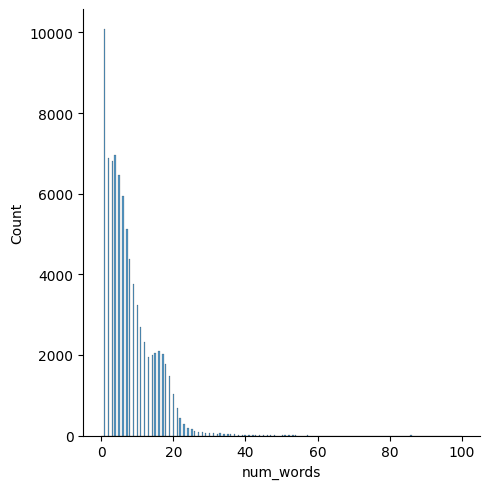

In [23]:
sns.displot(df_texto['num_words'])

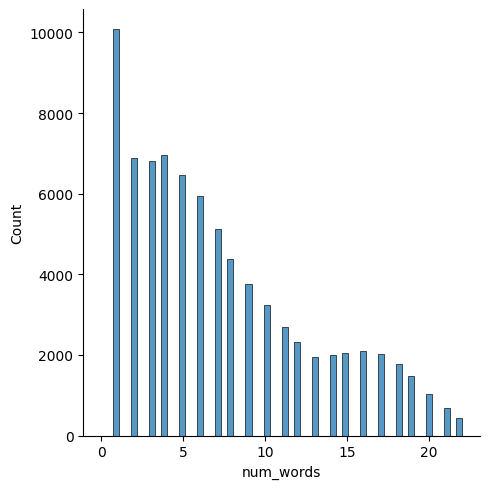

In [19]:
q = df_texto['num_words'].quantile(0.98)
df_q = df_texto[df_texto['num_words'] <= q]

sns.displot(df_q['num_words'])

In [22]:
df_texto[df_texto['num_words'] == 4]

,id,Audio,Text,Tokens,num_words
10,10.0,MSP-Conversation_0002,Our website is Americhicks.com.,"[2621, 3144, 307, 22597, 480, 7663, 13, 1112, 13]",4
31,31.0,MSP-Conversation_0002,I'll let you know.,"[286, 603, 718, 291, 458, 13]",4
74,74.0,MSP-Conversation_0002,I got a question.,"[286, 658, 257, 1168, 13]",4
173,173.0,MSP-Conversation_0002,I had a feeling.,"[286, 632, 257, 2633, 13]",4
186,186.0,MSP-Conversation_0002,So here it is.,"[407, 510, 309, 307, 13]",4
...,...,...,...,...,...
81668,1013.0,MSP-Conversation_2281,clearly burned fur cat,"[4448, 13490, 2687, 3857]",4
81673,1018.0,MSP-Conversation_2281,"because the cat's like,","[570, 264, 3857, 311, 411, 11]",4
81689,1034.0,MSP-Conversation_2281,like even the music,"[411, 754, 264, 1318]",4
81690,1035.0,MSP-Conversation_2281,manages to be condescending.,"[22489, 281, 312, 2224, 37890, 2029, 13]",4


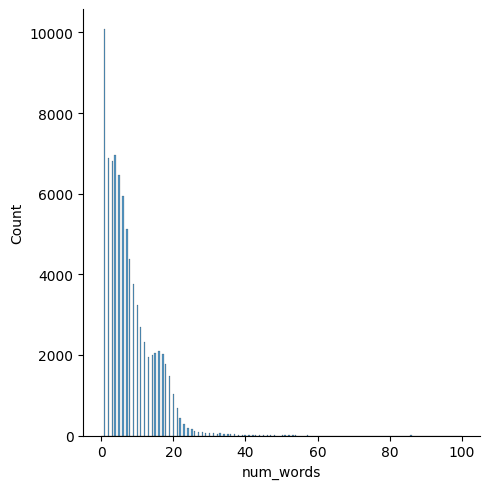

### Modelo

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample data
sentences = [
    "This is a positive review.",
    "This is a negative review.",
    "Amazing movie, loved it!",
    "Terrible movie, hated it."
]

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)

# Convert sentences to sequences of integers
sequences = tokenizer.texts_to_sequences(sentences)

# Pad sequences to ensure equal length
padded_sequences = pad_sequences(sequences, padding='post')

print("Tokenized Sequences:", sequences)
print("Padded Sequences:", padded_sequences)

Tokenized Sequences: [[2, 3, 4, 8, 5], [2, 3, 4, 9, 5], [10, 6, 11, 7], [12, 6, 13, 7]]
Padded Sequences: [[ 2  3  4  8  5]
 [ 2  3  4  9  5]
 [10  6 11  7  0]
 [12  6 13  7  0]]


In [25]:
import numpy as np

# Example labels (0 for negative, 1 for positive)
labels = np.array([1, 0, 1, 0])

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1000, output_dim=16, input_length=padded_sequences.shape[1]),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(padded_sequences, labels, epochs=10)

# Evaluate the model
loss, accuracy = model.evaluate(padded_sequences, labels)
print("Accuracy:", accuracy)

Epoch 1/10
1/1 [==============================] - 0s 390ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.7500
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.7500
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 998us/step - loss: 0.6869 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 94ms/step - loss: 0.6856 - accuracy: 1.0000
Accuracy: 1.0
